In [106]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import load_model

data = pd.read_csv('./data/multi_data.csv', encoding='cp949')
data.shape
# https://github.com/biranchi2018/Multi-Label-Image-Classification-on-Movies-Poster-using-CNN/blob/master/Multi_Label_Image_Classification_on_Movies_Poster_using_CNN.ipynb

(9742, 8)

In [80]:
data.head()

,image,can,glass,pack,paper,pet,plastic,vinyl
0,3403540.jpg,0,0,1,0,0,0,0
1,3403580.jpg,0,0,1,0,0,0,0
2,3403658.jpg,1,0,0,0,0,0,0
3,3403788.jpg,0,1,0,0,0,0,0
4,3403841.jpg,0,0,0,1,0,0,0


In [81]:
img_width = 200
img_height = 150

X = []

for i in tqdm(range(data.shape[0])):
    path = './data/multi_images/' + data['image'][i]
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)
     

100%|████████████████████████████████████████████████████████████████████████████| 9742/9742 [00:08<00:00, 1105.86it/s]


In [83]:
y = data.drop(['image'], axis = 1)
y = y.to_numpy()
y.shape

(9742, 7)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [85]:
X_train[0].shape

(200, 150, 3)

In [86]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(200,150, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

num_classes = 7

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              12583936  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 27,305,799
Trainable params: 19,670,535
Non-trainable params: 7,635,264
___________________________________

In [88]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15,horizontal_flip=True, fill_mode="nearest")


In [93]:
EPOCHS= 20 #5
BS = 16#64

history = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),validation_data=(X_test, y_test), 
                    steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

C:\Users\yu\AppData\Local\Temp\ipykernel_3088\175701709.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),validation_data=(X_test, y_test),


Epoch 1/5
129/129 [==============================] - 473s 4s/step - loss: 0.4025 - accuracy: 0.4159 - val_loss: 0.3646 - val_accuracy: 0.4815
Epoch 2/5
129/129 [==============================] - 500s 4s/step - loss: 0.3569 - accuracy: 0.4929 - val_loss: 0.3289 - val_accuracy: 0.5280
Epoch 3/5
129/129 [==============================] - 508s 4s/step - loss: 0.3371 - accuracy: 0.5186 - val_loss: 0.3184 - val_accuracy: 0.5315
Epoch 4/5
129/129 [==============================] - 498s 4s/step - loss: 0.3244 - accuracy: 0.5389 - val_loss: 0.3379 - val_accuracy: 0.5328
Epoch 5/5
129/129 [==============================] - 500s 4s/step - loss: 0.3118 - accuracy: 0.5601 - val_loss: 0.3247 - val_accuracy: 0.5185


In [94]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

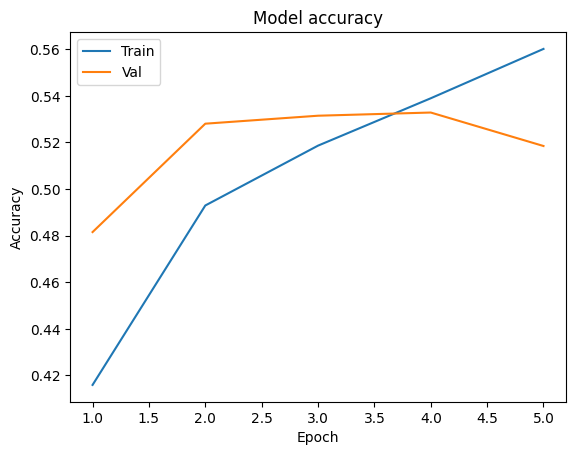

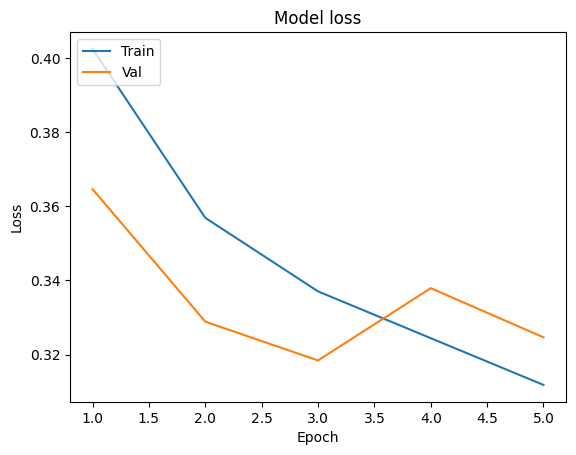

In [95]:
plot_learningCurve(history, 5)

In [96]:
model.save('./data/Model_4d.h5')

1/1 [==============================] - 0s 83ms/step
vinyl 일 확률 0.9473936
can 일 확률 0.39469847
plastic 일 확률 0.20733266


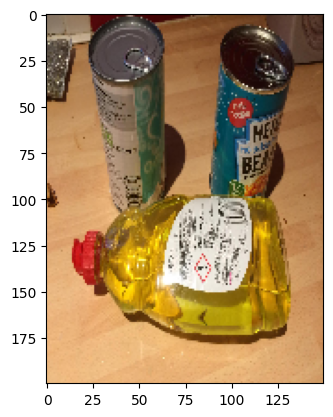

In [118]:
img = image.load_img('./data/000047.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = ['can', 'glass', 'pack', 'paper', 'pet', 'plastic', 'vinyl']

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1] # 역순(퍼센트 높은 순으로 3개만 정렬)

for i in range(3):
    print(classes[top3[i]],'일 확률',  y_prob[0][top3[i]])

In [104]:
def find_genre(test_path, model_path):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    classes = ['can', 'glass', 'pack', 'paper', 'pet', 'plastic', 'vinyl']

    for i in range(3):
        print( classes[top_3[i]],'일 확률 : ', prob[0][top_3[i]] )
    plt.imshow(img)

1/1 [==============================] - 0s 160ms/step
glass 일 확률 :  0.38138756
pet 일 확률 :  0.29270405
plastic 일 확률 :  0.21927084


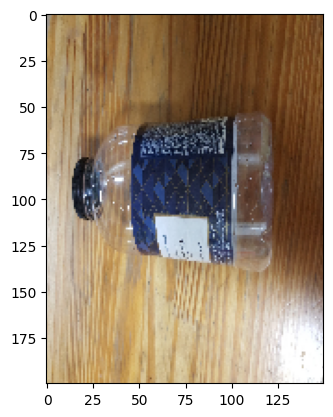

In [122]:
find_genre("./data/3706844.jpg",'./data/Model_4d.h5')